<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт" data-toc-modified-id="Импорт-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт</a></span></li><li><span><a href="#Описание" data-toc-modified-id="Описание-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Корреляция признаков</a></span></li><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Sanity check</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-металлов-на-этапах-процесса-обогащения" data-toc-modified-id="Распределение-металлов-на-этапах-процесса-обогащения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение металлов на этапах процесса обогащения</a></span></li><li><span><a href="#Распределение-размеров-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределение-размеров-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-металлов-на-этапах-процесса-обогащения" data-toc-modified-id="Суммарная-концентрация-металлов-на-этапах-процесса-обогащения-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация металлов на этапах процесса обогащения</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор модели</a></span><ul class="toc-item"><li><span><a href="#Этап-флотации" data-toc-modified-id="Этап-флотации-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Этап флотации</a></span></li><li><span><a href="#Финальный-этап" data-toc-modified-id="Финальный-этап-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Финальный этап</a></span></li></ul></li><li><span><a href="#Прогнозирование-на-тестовой-выборке" data-toc-modified-id="Прогнозирование-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Прогнозирование на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

В рамках задачи необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Данные находятся в трёх файлах:
- `gold_industry_train.csv` — обучающая выборка;
- `gold_industry_test.csv` — тестовая выборка;
- `gold_industry_full.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

Для измерения качества предсказания предлагается использовать метрику sMAPE.

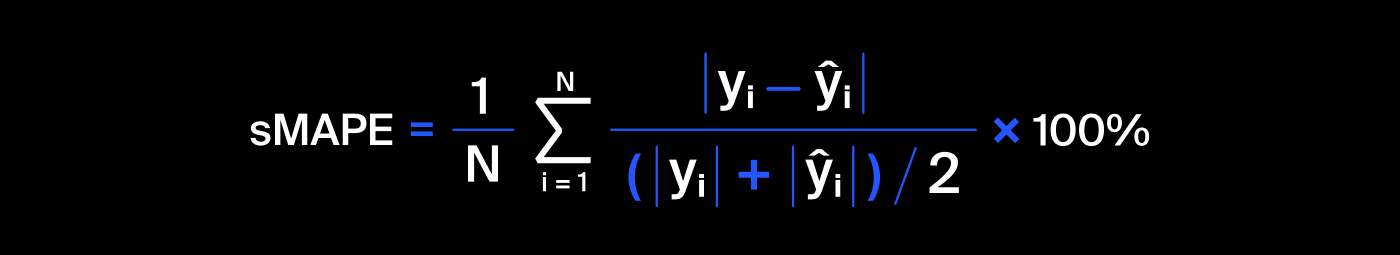

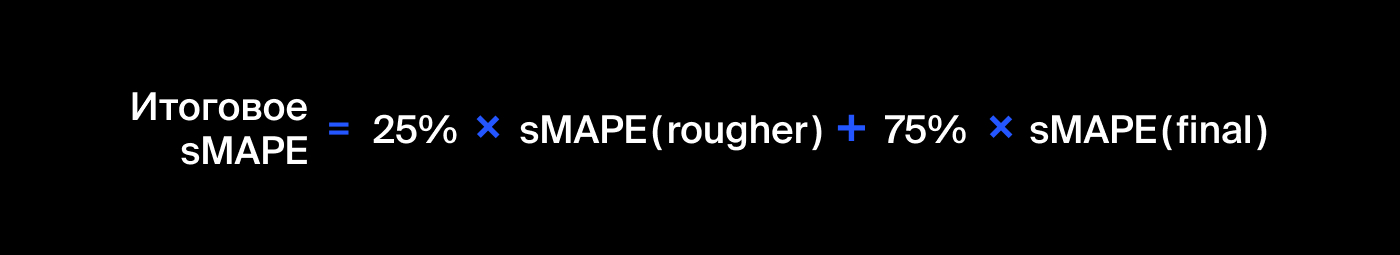

## Подготовка данных

### Импорт

Импортируем необходимые для работы библиотеки. Считаем данные из csv-файлов в датафреймы, сохраним в переменные `train_df`, `test_df` и `full_df`, выведем на экран первые пять строк каждой таблицы.

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    make_scorer,
    mean_absolute_error
)
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    cross_val_score,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge
)

In [2]:
try:
    train_df = pd.read_csv('gold_industry_train.csv')
    test_df = pd.read_csv('gold_industry_test.csv')
    full_df = pd.read_csv('gold_industry_full.csv')
except:
    train_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')
    test_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
    full_df = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

# отображение всех столбцов таблицы
pd.set_option('display.max_columns', None)

train_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [3]:
test_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [4]:
full_df.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

### Описание

Выведем общую информацию о датасетах.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


В датасетах от 53 до 87 признаков, в строках есть пропуски в незначительном количестве. Все признаки имеют тип `float`, кроме даты. Его следует переконвертировать для удобства работы. В таблице с тестовыми данными отсутствуют признаки этапа `final` и параметров: `output`, `calculation`. В них содержатся данные по степени обогащения, по концентрации металлов в продукте и отвальных хвостах, и расчетные характеристики.

Признаки разделены по этапам и параметрам: `[этап]`.`[тип_параметра]`.`[название_параметра]`.

Этапы:

- `rougher` — флотация;
- `primary_cleaner` — первичная очистка;
- `secondary_cleaner` — вторичная очистка;
- `final` — финальные характеристики.

Типы параметров:

- `input` — параметры сырья;
- `output` — параметры продукта;
- `state` — параметры, характеризующие текущее состояние этапа;
- `calculation` — расчётные характеристики.

Параметры сырья:

- `feed_XXX` — доля металла `XXX` в сырье: Au - золото, Ag - серебро, Pb - свинец, sol - коллоидный раствор;
- `feed_rate` — скорость подачи сырья;
- `feed_size` — размер гранул;
- `floatbankX_sulfate` — параметр сульфата на флотационной установке `X`;
- `floatbankX_xanthate` — параметр ксантогената на флотационной установке `X`;

Параметры обогащения руды:

- `floatbankX_y_air` — параметр объема воздуха `y` на флотационной установке `X`;
- `floatbankX_y_level` — параметр уровня жидкости `y` на флотационной установке `X`;

Расчетные характеристики:

- `sulfate_to_au_concentrate` — зависимость сульфата и золота;
- `floatbankX_sulfate_to_au_feed` — зависимость сульфата во флотационной установке `X` и доли золота в сырье;
- `floatbankX_sulfate_to_au_feed` — зависимость сульфата во флотационной установке `X` и доли золота в сырье;
- `au_pb_ratio ` — зависимость доли золота и доли свинца;

Параметры продукта:

- `concentrate_XXX` — концентрация вещества `XXX` в продукте: Au - золото, Ag - серебро, Pb - свинец, sol - коллоидный раствор;
- `tail_XXX` — концентрация вещества `XXX` в отвальном хвосте: Au - золото, Ag - серебро, Pb - свинец, sol - коллоидный раствор;
- `recovery` — эффективность обогащения.

Остальные признаки:

- `date` — время получения информации;

Целевыми признаками для подсчета эффективности обогащения руды являются `concentrate_au` и `tail_au` на этапах `rougher` и `final`.


In [8]:
# конвертация типа столбца с датой
for i in [train_df, test_df, full_df]:
    i['date'] = pd.to_datetime(i['date'])
    print(i['date'].dtype) # проверка

datetime64[ns]
datetime64[ns]
datetime64[ns]


In [9]:
# вывод признаков, которые отсуствуют в тестовой выборке
for i in train_df.columns:
    if i not in test_df.columns:
        print(i)

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_au
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
secondary_cleaner.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
final.output.concentrate_au
final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_au
final.output.ta

**Промежуточный вывод:** можно заметить, что недоступны признаки `output` (параметры продукта: концентраты, хвосты, эффективность обогащения) и `calculation` (расчетные характеристики: зависимости параметров флотационной установки, отношение золта к свинцу), так как эти данные являются результатами этапов технологического процесса и становятся известны только после окончания соответствующего этапа.

Таким образом, перед нами регрессионная задача обучения с учителем. В рамках задачи необходимо будет сделать проверку на мультиколлинеарность и закодировать численные признаки.

### Корреляция признаков

Так как датафрейм с таким большим количеством признаков неудобен для анализа, разделим тренировочную выборку на четыре таблицы согласно этапам.

In [10]:
# разделение тренировочной выборки по этапам
rougher = train_df.filter(
    like='rougher',
    axis=1
)
primary = train_df.filter(
    like='primary',
    axis=1
)
secondary = train_df.filter(
    like='secondary',
    axis=1
)
final = train_df.filter(
    like='final',
    axis=1
)

Признаков очень много, велика вероятность, что они линейно зависят друг от друга, что негативно скажется на регрессионных моделях. Необходимо исследовать корреляцию признаков. Проделаем это в рамках каждого этапа.

In [11]:
'''
Функция принимает датафрейм и границу корреляции.
На выходе выдается корреляционная матрица с теми столбцами,
где есть хотя бы одно не NaN значение больше заданной границы корреляции, и хитмэп.
Если таковых нет, выводится сообщение.
'''

def display_corr(df, border):
    corr_matrix = df.corr()
    
    # ищем столбцы, где значения по модулю выше border
    corr_matrix = corr_matrix[
        ((corr_matrix > border) & (corr_matrix < 1)) |
        ((corr_matrix < -border) & (corr_matrix > -1))]
    
    # удаляем NaN
    corr_matrix.dropna(axis=0, how='all', inplace=True)
    corr_matrix.dropna(axis=1, how='all', inplace=True)
    
    if corr_matrix.shape[0] > 0:
        display(corr_matrix.round(2))
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            linewidths=.5,  
            linecolor='black');
        return corr_matrix
    else: print(
        f'Признаков с коэффициентом корреляции более {border} не выявлено')

,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_xanthate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.input.floatbank10_xanthate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,NaN,NaN
rougher.state.floatbank10_b_air,NaN,NaN,NaN,0.94,NaN,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rougher.state.floatbank10_b_level,NaN,NaN,NaN,NaN,0.99,NaN,0.97,NaN,0.95,NaN,0.95,NaN,NaN,NaN
rougher.state.floatbank10_c_air,NaN,0.94,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rougher.state.floatbank10_c_level,NaN,NaN,0.99,NaN,NaN,NaN,0.98,NaN,0.96,NaN,0.95,NaN,NaN,NaN
rougher.state.floatbank10_d_air,NaN,0.93,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rougher.state.floatbank10_d_level,NaN,NaN,0.97,NaN,0.98,NaN,NaN,NaN,0.95,NaN,0.95,NaN,NaN,NaN
rougher.state.floatbank10_e_air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94,NaN,NaN,NaN,NaN
rougher.state.floatbank10_e_level,NaN,NaN,0.95,NaN,0.96,NaN,0.95,NaN,NaN,NaN,0.98,NaN,NaN,NaN
rougher.state.floatbank10_f_air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94,NaN,NaN,NaN,NaN,NaN,NaN


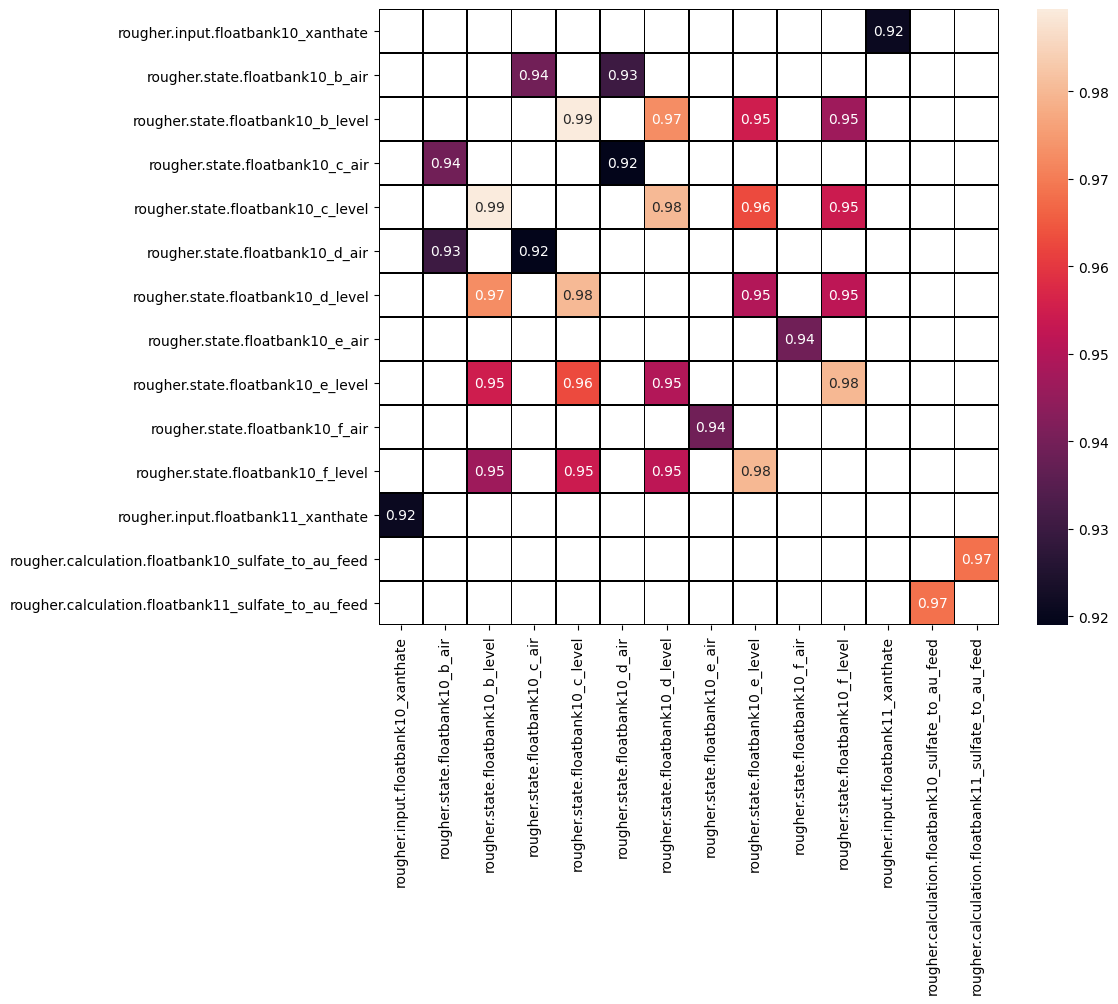

In [12]:
temp = display_corr(rougher, 0.9)

Часть признаков можно удалить, так как они линейно связаны с другими. Удалим и столбцы с вычислениями (`calculation`), они отсутствуют в тестовой выборке, потому что замеряются и/или рассчитываются значительно позже.   

In [13]:
'''
Функция принимает датафрейм, список и номера "хороших" признаков.
"Хорошие" признаки удаляются, в список добавляются все остальные признаки.
Функция печатает получившийся список и возвращает его.
'''

def add_delete(df, temp_list, column_id):
    temp_list.extend(
        df.drop(df.columns[column_id], axis=1).columns)
    print(*temp_list, sep='\n')
    return temp_list

In [14]:
# список признаков под удаление
to_delete = list(
    train_df.filter(
        like='calc',
        axis=1).columns
)

to_delete = add_delete(temp, to_delete, [0, 1, 2, 7, 12, 13])

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.state.floatbank10_e_level
rougher.state.floatbank10_f_air
rougher.state.floatbank10_f_level
rougher.input.floatbank11_xanthate


,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb
primary_cleaner.state.floatbank8_a_air,NaN,NaN,0.96,0.92,NaN,NaN,NaN
primary_cleaner.state.floatbank8_a_level,NaN,NaN,NaN,NaN,0.94,NaN,NaN
primary_cleaner.state.floatbank8_b_air,0.96,NaN,NaN,0.93,NaN,NaN,NaN
primary_cleaner.state.floatbank8_c_air,0.92,NaN,0.93,NaN,NaN,NaN,NaN
primary_cleaner.state.floatbank8_c_level,NaN,0.94,NaN,NaN,NaN,NaN,NaN
primary_cleaner.output.tail_ag,NaN,NaN,NaN,NaN,NaN,NaN,0.93
primary_cleaner.output.tail_pb,NaN,NaN,NaN,NaN,NaN,0.93,NaN


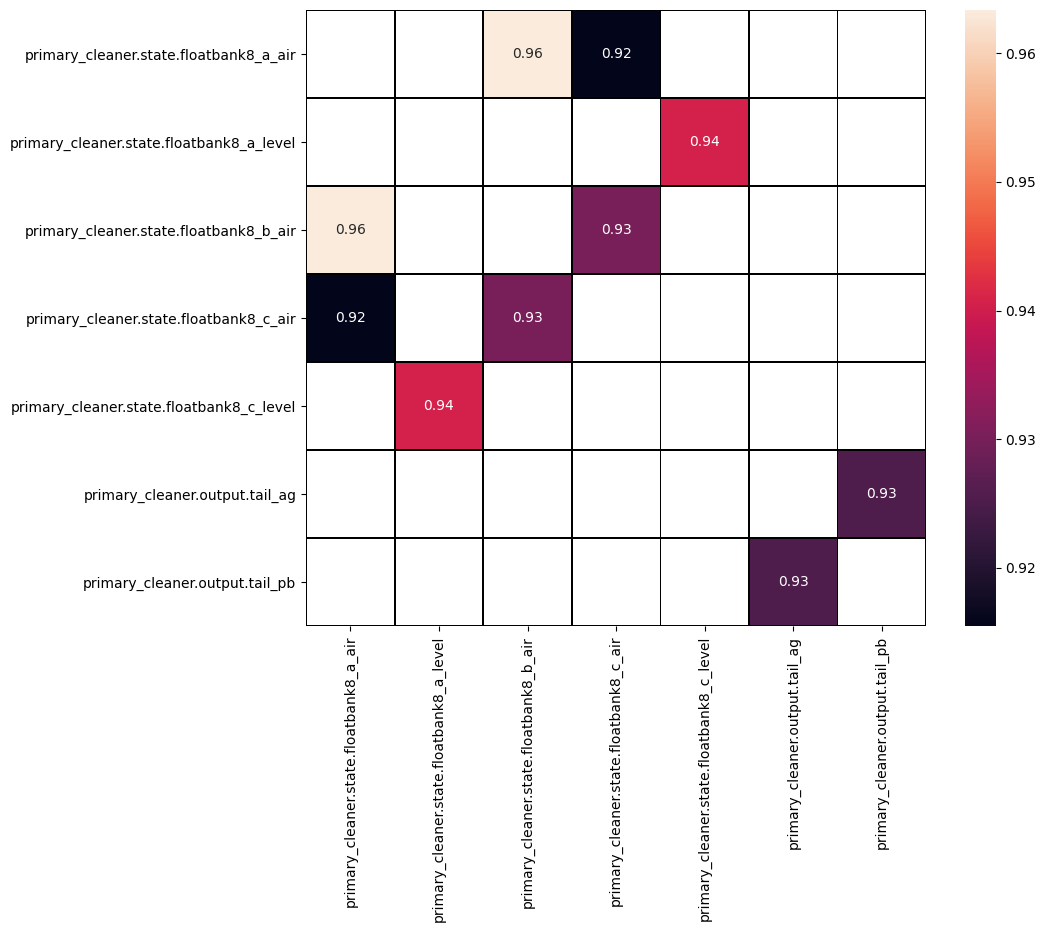

In [15]:
temp = display_corr(primary, 0.9)

Часть признаков можно удалить, так как они линейно связаны с другими.

In [16]:
to_delete = add_delete(temp, to_delete, [0, 1, 5])

rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.state.floatbank10_e_level
rougher.state.floatbank10_f_air
rougher.state.floatbank10_f_level
rougher.input.floatbank11_xanthate
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.output.tail_pb


In [17]:
temp = display_corr(secondary, 0.9)

Признаков с коэффициентом корреляции более 0.9 не выявлено


In [18]:
temp = display_corr(final, 0.9)

Признаков с коэффициентом корреляции более 0.9 не выявлено


Таким образом, получен список признаков для удаления из тренировочной и тестовой выборок.

**Промежуточный вывод:** в тренировочной выборке нашлись признаки с высокой линейной зависимостью. Подобные признаки будут удалены из датасета в следующей главе.

### Пропуски и дубликаты

Проверим датафреймы на явные дубликаты.

In [19]:
train_df.duplicated().sum()

0

In [20]:
test_df.duplicated().sum()

0

In [21]:
full_df.duplicated().sum()

0

Явных дубликатов нет. Заполним пропуски предыдущим значением с помощью метода `ffil`, так как по условию соседние по времени параметры часто похожи.

In [22]:
# удаление коллинеарных признаков
train_df.drop(columns=to_delete, inplace=True)
train_df.fillna(method="ffill", inplace=True)
# проверка
train_df.isna().sum().sum()

0

In [23]:
# удаление коллинеарных признаков
test_df.drop(columns=to_delete, inplace=True, errors='ignore')
test_df.fillna(method="ffill", inplace=True)
# проверка
test_df.isna().sum().sum()

0

**Промежуточный вывод:** явных дубликатов не было найдено в датасетах, пропуски были заполнены предыдущими известными значениями.

### Sanity check

Проведем sanity check данных. Проверим, есть ли объекты, в которых доля золота в сырье `feed_au` или `rougher.output.concentrate_au` равна нулю, либо доля золота в отвале `tail_au` превышает долю золота в сырье.

In [24]:
# вспомогательный датафрейм для визуализации
temp_df = pd.DataFrame()

# добавляем данные с начальной долей Au равной нулю
temp_df = pd.concat(
    [temp_df,
    train_df[train_df['rougher.input.feed_au'] == 0]
    ])

# добавляем данные с долей Au равной нулю на выходе флотации
temp_df = pd.concat(
    [temp_df,
    train_df[train_df['rougher.output.concentrate_au'] == 0]
    ])

# добавляем данные, где доля Au в отвале больше доли Au в сырье
temp_df = pd.concat(
    [temp_df,              
    train_df[train_df['rougher.output.tail_au'] > train_df['rougher.input.feed_au']]
    ])

# добавляем данные, где доля Au в отвале больше доли Au после флотации
temp_df = pd.concat(
    [temp_df,              
    train_df[train_df['final.output.tail_au'] > train_df['rougher.output.concentrate_au']]
    ])

temp_df.drop_duplicates(inplace=True)
print(f'Количество "подозрительных" объектов в обучающей выборке: {temp_df.shape[0]}')
temp_df.head()

Количество "подозрительных" объектов в обучающей выборке: 399


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
36,2016-01-16 12:00:00,7.114065,7.521974,2.811569,41.154430,581.605260,65.620714,13.322740,7.504592,999.026619,-499.850895,1600.614880,-500.331775,1197.182011,13.311361,0.0,0.0,0.0,0.0,0.0,1.939811,4.784398,0.818965,20.046797,131.251366,13.969457,7.25,1.203034,1601.674776,-500.285160,-499.633542,1599.342687,-500.360306,37.633572,8.513177,9.724797,19.120964,3.434734,16.455383,6.864404,25.963860,-498.097243,23.896954,-500.047419,24.963926,-500.207267,23.984937,-500.613261,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,3.102137,13.605154,4.983564,9.545239,46.614456,4.566664,10.406178,4.588698,68.403877,2.509776,10.705777,1.509070,17.875134
37,2016-01-16 13:00:00,7.651522,7.313187,2.973841,41.983063,562.972841,66.014780,14.433889,7.583598,999.846655,-500.082738,1599.408126,-500.189249,1198.632079,14.482716,0.0,0.0,0.0,0.0,0.0,2.087628,4.955785,0.891051,19.633741,141.184039,13.978607,7.25,1.248254,1604.852903,-500.922517,-499.631837,1599.437018,-499.307245,37.718947,8.466262,9.780929,19.220963,3.102171,15.517931,7.321526,25.946448,-502.052990,23.903017,-500.245612,25.029826,-499.896144,23.963950,-499.786821,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,2.920315,13.130989,5.043644,9.734058,46.250638,4.577832,10.691605,5.274175,70.675633,2.540843,10.728531,1.641216,18.349339
38,2016-01-16 14:00:00,5.587750,7.934791,1.763437,41.983063,229.379445,40.601032,10.865871,5.648950,1003.354806,-501.078303,1603.648910,-498.000810,1203.394353,10.786929,0.0,0.0,0.0,0.0,0.0,2.126460,4.990718,0.901107,19.096033,126.397495,12.709727,7.25,1.2

Некоторые объекты не прошли sanity check, их необходимо удалить,

In [25]:
size = train_df.shape[0] - train_df.drop(index=temp_df.index).shape[0]
print(
    f'Удалено {temp_df.shape[0]} из {train_df.shape[0]} '\
    f'строк в тестовой выборке ({round(size/train_df.shape[0] * 100)}%)'
)
train_df.drop(index=temp_df.index, inplace=True)
train_df.shape # проверка

Удалено 399 из 14579 строк в тестовой выборке (3%)


(14180, 71)

Проверим и тестовую выборку.

In [26]:
# вспомогательный датафрейм для визуализации
temp_df = pd.DataFrame()

# добавляем данные с начальной долей Au равной нулю
temp_df = pd.concat(
    [temp_df,
    test_df[test_df['rougher.input.feed_au'] == 0]
    ])

temp_df.drop_duplicates(inplace=True)
print(f'Количество "подозрительных" объектов в контрольной выборке: {temp_df.shape[0]}')
temp_df.head()

Количество "подозрительных" объектов в контрольной выборке: 0


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**Промежуточный вывод:** часть объектов (399 штук) не прошла sanity check и была удалена.

### Проверка эффективности обогащения

Вычислим эффективность обогащения `recovery`, используя табличные данные. Эффективность обогащения рассчитывается по формуле:

`recovery = C * (F - T) / F * (C - T) * 100`, где

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.


Таким образом, для расчета необходимо использовать данные столбцов `feed_au`, `concentrate_au`, `tail_au`. Для проверки используем MAE.

In [27]:
'''
Функция принимает значения C, F и T, и
выводит значение recovery
'''

def recovery_calc(C, F, T):
    return (C * (F - T))/(F * (C - T)) * 100

In [28]:
rougher_recovery = recovery_calc(
    train_df['rougher.output.concentrate_au'],
    train_df['rougher.input.feed_au'],
    train_df['rougher.output.tail_au']
)
mean_absolute_error(
    train_df['rougher.output.recovery'],
    rougher_recovery).round(2)

0.0

In [29]:
final_recovery = recovery_calc(
    train_df['final.output.concentrate_au'],
    train_df['rougher.input.feed_au'],
    train_df['final.output.tail_au']
)
mean_absolute_error(
    train_df['final.output.recovery'],
    final_recovery).round(2)

0.0

**Промежуточный вывод:** MAE показывает, что эффективность обогащения посчитана правильно.

## Анализ данных

### Распределение металлов на этапах процесса обогащения

Проверим как меняется концентрация металлов на различных этапах.

In [30]:
'''
Функция для отрисовки единичного графика.
Принимает название, а также названия осей.
'''

def single_graph(
    title,
    ylabel,
    xlabel,
    size = (12, 8),
    xlim=None,
    ylim=None):
    
    fig, ax = plt.subplots(figsize=size)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # если лимит указан, то устанавливает его
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    ax.grid();

In [31]:
'''
Функция принимает датафрейм и символ металла (au, ag, pb).
Далее фильтрует выборку по виду металла и создает таблицу с концентрациями.
Выводит диаграмму по концентрациям.
'''
def metal_dist(df, metal):
    # ищем признаки с конценрацией интересующего металла
    temp = df.filter(like=metal, axis=1)
    temp = temp.filter(like='conc', axis=1)
                       
    temp.columns = [
        'Черновой концентрат', 
        'Концентрат первой очистки', 
        'Финальный концентрат'
    ]
    # добавляем столбец с сырьём
    temp.insert(0, 'Сырьё',  df['rougher.input.feed_' + metal])
    
    # построение диаграммы
    single_graph(
        'Распределение концентраций металла ' + metal + ' по этапам',
        'Частота',
        'Доля металла, %',
    )
    sns.histplot(data=temp, bins=200);

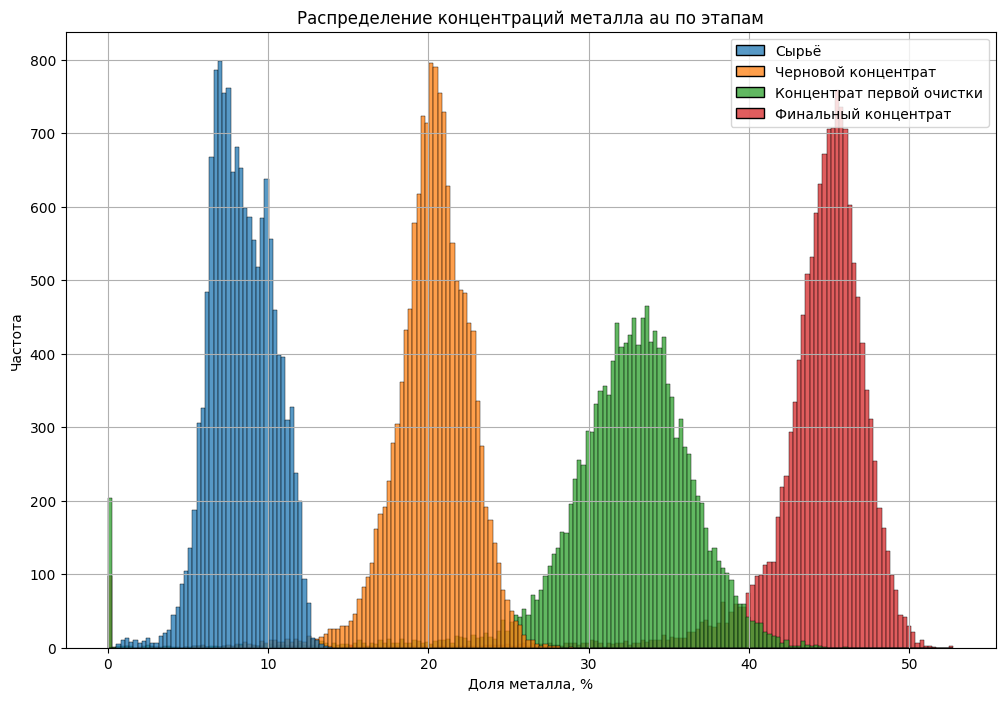

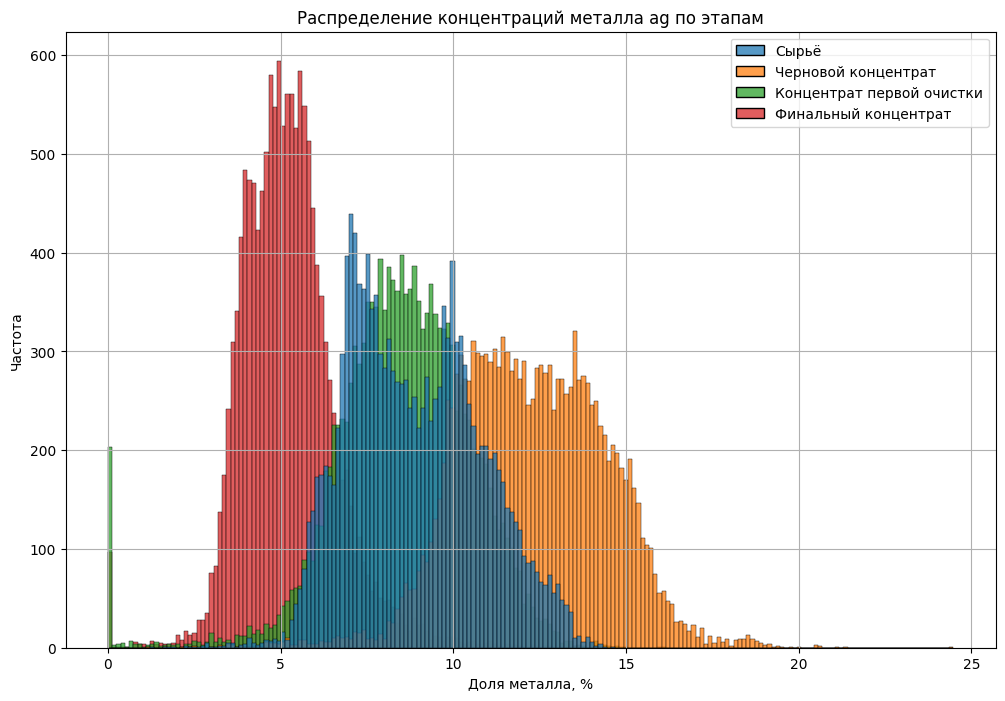

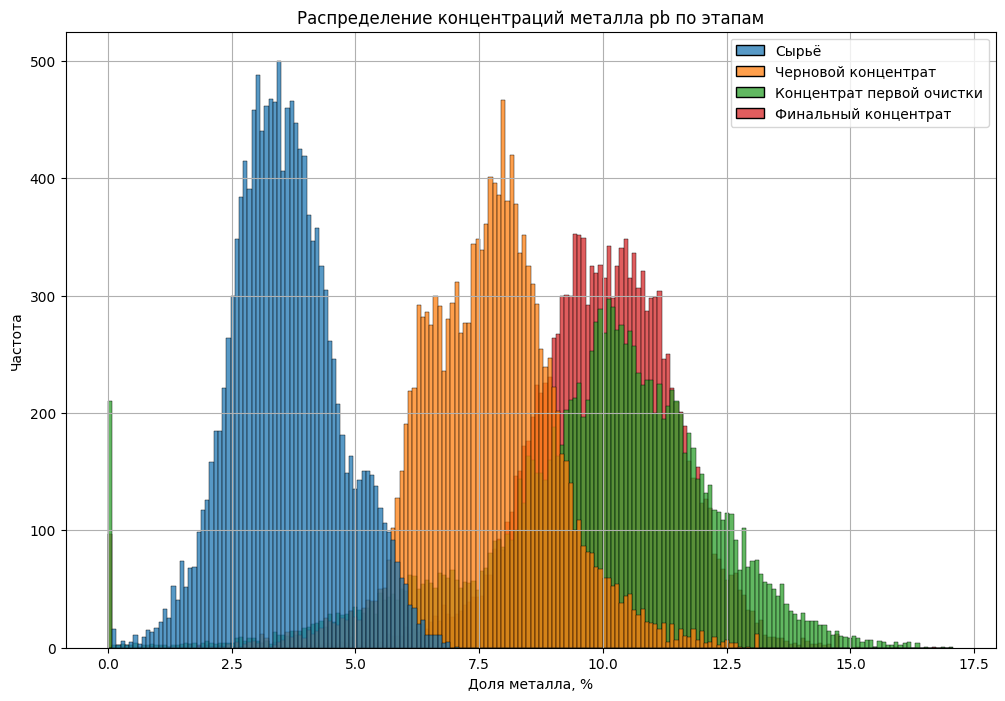

In [32]:
for i in ['au', 'ag', 'pb']:
    metal_dist(train_df, i)

На диаграммах заметны выбросы в районе нуля: околонулевые концентрации веществ, как правило на этапе первой очистки и финальном этапе. Проверим эти данные.

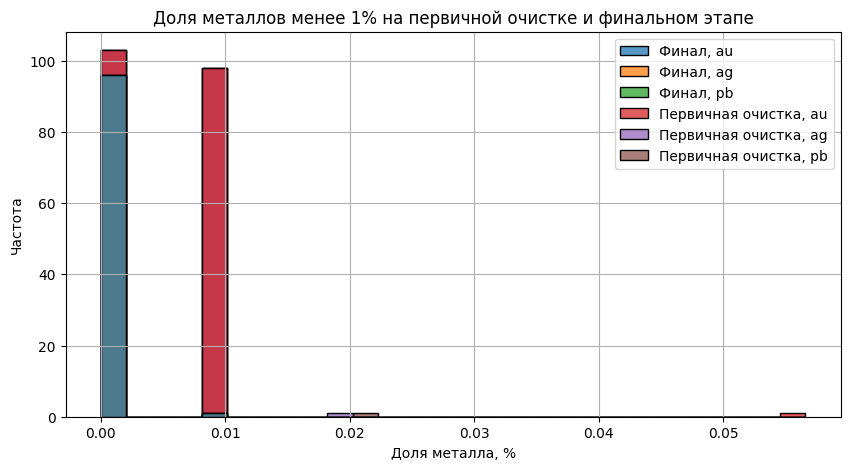

In [33]:
# собираем данные на этапе primary с концентрацией au < 0.1
primary_strange = train_df[
    train_df[
        'primary_cleaner.output.concentrate_au'] < 0.1]
primary_strange = primary_strange.filter(
    like='primary_cleaner.output.conc')

# удаление признака sol
primary_strange.drop(
    primary_strange.columns[-1],
    axis=1,
    inplace=True)
primary_strange.columns = [
    'Первичная очистка, au',
    'Первичная очистка, ag',
    'Первичная очистка, pb']

# собираем данные на этапе final с концентрацией au < 0.1
final_strange = train_df[
    train_df['final.output.concentrate_au'] < 0.1]
final_strange = final_strange.filter(
    like='final.output.conc')

# удаление признака sol
final_strange.drop(
    final_strange.columns[-1],
    axis=1,
    inplace=True)

final_strange.columns = [
    'Финал, au',
    'Финал, ag',
    'Финал, pb']
single_graph(
    'Доля металлов менее 1% на первичной очистке и финальном этапе',
    'Частота',
    'Доля металла, %',
    size=(10, 5)
)
sns.histplot(data=pd.concat([final_strange, primary_strange]));

Таких данных немного, их можно удалить и заново построить распределения.

In [34]:
print(f'Было: {train_df.shape}')
train_df = train_df[
    train_df['primary_cleaner.output.concentrate_au'] > 0.1]
train_df = train_df[
    train_df['final.output.concentrate_au'] > 0.1]
print(f'Стало: {train_df.shape}')

Было: (14180, 71)
Стало: (13883, 71)


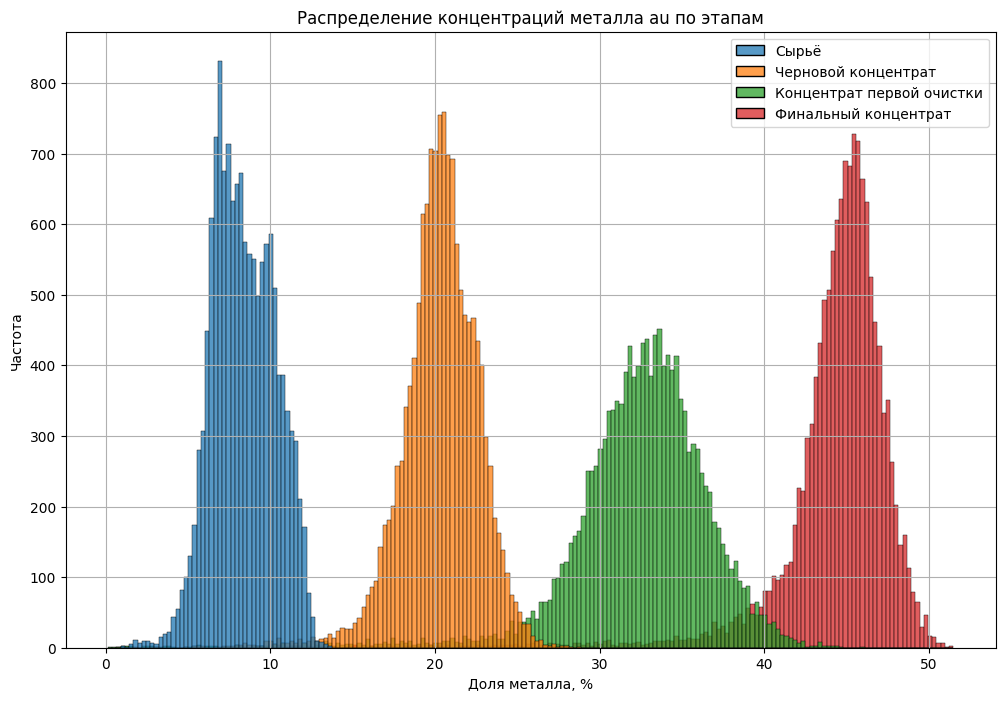

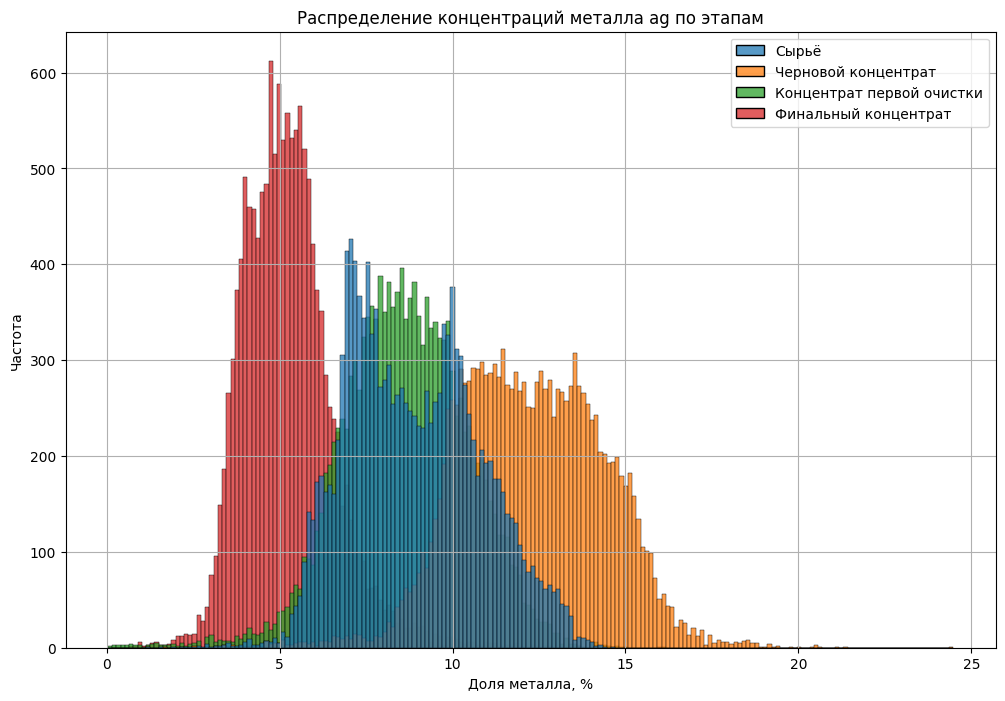

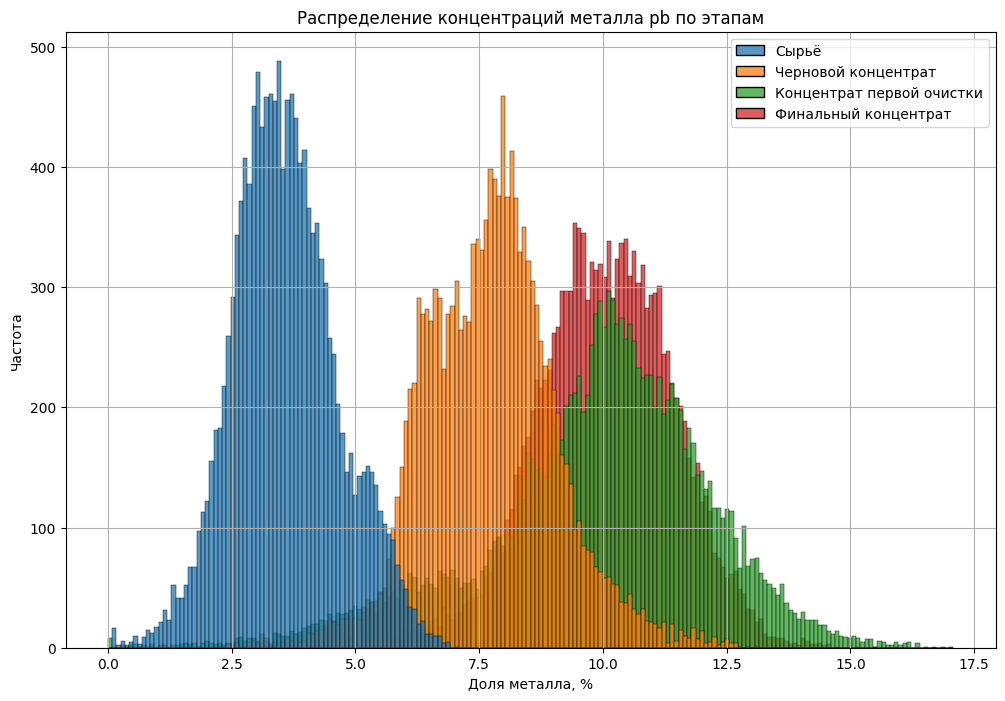

In [35]:
# датафрейм дяя исследования суммарных концентраций металлов в следующей главе
summary = pd.DataFrame()

for i in ['au', 'ag', 'pb']:
    summary = pd.concat(
        [summary,
         metal_dist(train_df, i)],
        axis=1)

**Промежуточный вывод:** концентрация золота распределяется по нормальному закону во всех этапах, заметно, что доля золота растет после каждого процесса обогащения, что закономерно. Можно отметить, что концентрат первой очистки имеет б**о**льшую дисперсию, чем остальные этапы.

Доля серебра не так сильно меняется в процессе обогащения, по крайней мере на первых трёх этапах. Заметно, что после финальной обработки доля серебра в конечно продукте падает.

Распределение свинца похоже на распределение золота, но если доля золота с каждой итерацей возрастает, то для свинца процесс останавливается на этапе первой очистки. Последующая обработка значительным образом не влияет на долю свинца в продукте.

### Распределение размеров гранул на обучающей и тестовой выборках

Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

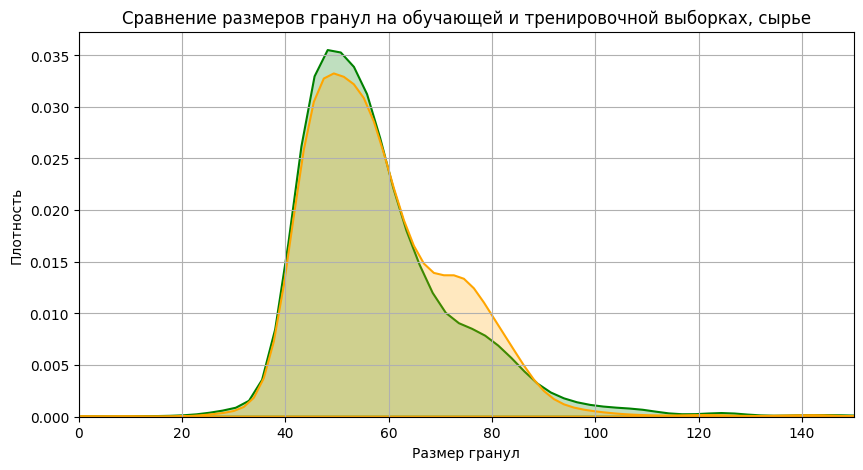

In [36]:
single_graph(
    'Сравнение размеров гранул на обучающей и тренировочной выборках, сырье',
    'Плотность',
    'Размер гранул',
    size=(10, 5),
    xlim=(0, 150)
)
sns.kdeplot(
    data=train_df['rougher.input.feed_size'],
    fill=True,
    linewidth=1.5,
    color='green'
)
sns.kdeplot(
    data=test_df['rougher.input.feed_size'],
    fill=True,
    linewidth=1.5,
    color='orange'
);

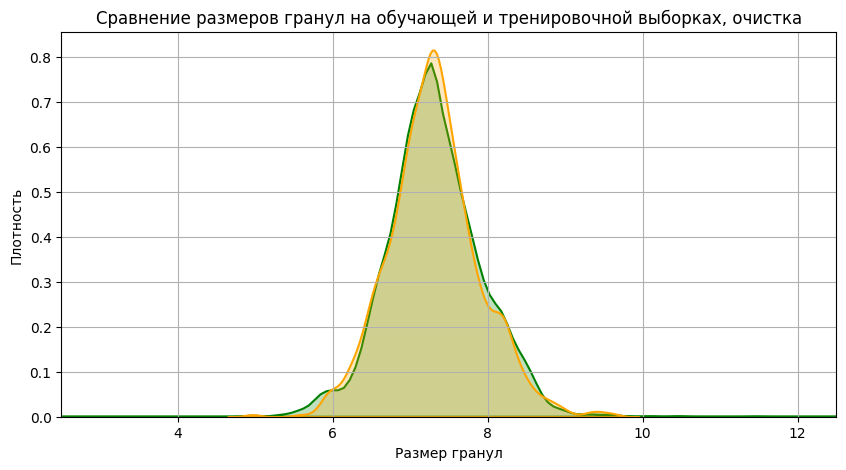

In [37]:
single_graph(
    'Сравнение размеров гранул на обучающей и тренировочной выборках, очистка',
    'Плотность',
    'Размер гранул',
    size=(10, 5),
    xlim=(2.5, 12.5)
)
sns.kdeplot(
    data=train_df['primary_cleaner.input.feed_size']
    , fill=True,
    linewidth=1.5,
    color='green'
)
sns.kdeplot(
    data=test_df['primary_cleaner.input.feed_size'],
    fill=True,
    linewidth=1.5,
    color='orange'
);

**Промежуточный вывод:** распределения гранул на этапах сырья и первичной очистки похожи, модель можно обучать на тренировочных данных.

### Суммарная концентрация металлов на этапах процесса обогащения

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [38]:
# создаем таблицу с концентрациями металлов, выкидываем оттуда sol
summary = train_df.filter(
    like='conc',
    axis=1)
summary = summary.drop(summary.filter(
    like='sol').columns,
    axis=1)

# создаем новые столбцы с суммами концентраций по этапам
summary['Черновой концентрат'] = summary.filter(
    like='rougher', axis=1).sum(axis=1)

summary['Концентрат первичной очистки'] = summary.filter(
    like='primary', axis=1).sum(axis=1)

summary['Финальный концентрат'] = summary.filter(
    like='final', axis=1).sum(axis=1)

# оставляем последние три столбца, созданных только что
summary = summary[summary.columns[-3:]]

# добавление суммарной концентрации на этапе сырья
summary.insert(0, 'Сырьё', train_df[train_df.columns[1:4]].sum(axis=1))
summary.head()

,Сырьё,Черновой концентрат,Концентрат первичной очистки,Финальный концентрат
0,14.871440,38.395653,53.111627,58.137072
1,14.905729,38.945647,53.174338,58.699942
2,14.638299,38.649756,52.927464,58.927421
3,14.199305,38.411473,43.979185,58.714815
4,13.511497,38.867359,52.121146,59.065251


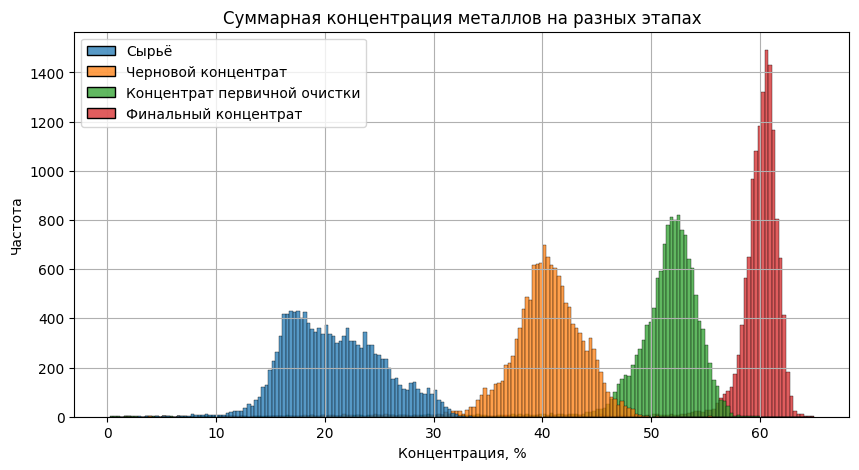

In [39]:
single_graph(
    'Суммарная концентрация металлов на разных этапах',
    'Частота',
    'Концентрация, %',
    size=(10, 5)
)
sns.histplot(data=summary, bins=200);

**Промежуточный вывод:** заметно, что концентрация растет за счет увеличения доли золота и свинца (см. главу 2.1), а дисперсия при этом уменьшается.

## Модель

Для того, чтобы рассчитать метрику качества _sMAPE_ для `rougher.output.recovery` и `final.output.recovery`, нам понадобятся значения, из которых вычисляется эффективность обогащения _recovery_:
- `rougher.output.concentrate_au` — неизвестна
- `rougher.input.feed_au` — известна
- `rougher.output.tail_au` — неизвестна
- `final.output.concentrate_au` — неизвестна
- `final.output.tail_au` — неизвестна

Итоговое sMAPE рассчитывается следующим образом:

_Итоговое sMAPE = 0.25 * sMAPE(rougher) + 0.75 * sMAPE(final)_

Таким образом, задача прогнозирования эффективности обогащения разделяется на несколько подзадач:

а) этап флотации
- поиск концентрации золота
- поиск отвального хвоста с золотом
- вычисление _recovery(rough)_

б) финальный этап
- поиск концентрации золота
- поиск отвального хвоста с золотом
- вычисление _recovery(final)_

в) расчеты
- вычисление _sMAPE(rough)_
- вычисление _sMAPE(final)_
- вычисление итогового _sMAPE_

### Выбор модели

In [40]:
'''
Функция принимает столбец с истинными значениями и с предсказанными.
Выводит sMAPE в процентах.
'''
def smape(y_true, y_pred):
    numerator = abs(y_true - y_pred)
    denominator = (abs(y_true) + abs(y_pred))/2
    return sum(numerator/denominator) * 100 / max(len(y_true), len(y_pred))

# создание кастомной функции потерь
custom_loss = make_scorer(smape, greater_is_better=False)

In [41]:
state = 42
scaler = StandardScaler()

'''
Функция для подбора гиперпараметров.
Принимает модель, вид поиска, признаки,, гиперпараметры для перебора и название модели для отображения.
Строит пайплайн, запускает поиск гиперпараметров, выводит значения гиперпараметров и скор на обучении.
Возвращает лучший пайплайн и лучшую метрику.

search_type:
C - cross_val_score
G - GridSearchCV
R - RandomizedSearchCV
'''
def pipe(model, search_type, X_train, y_train, params, name, scoring=custom_loss, cv=5):
     
    # ветка для cross_val_score
    if search_type == "C":      
        pipeline = make_pipeline(scaler, model)         
        model_score = cross_val_score(
            pipeline,
            X_train,
            y_train,
            scoring=scoring,
            cv=cv).mean() * -1
        # значение скоринга на кросс-валидации
        print(f'best_score: {model_score.round(3)}'\
             f' для модели {name}')
        storage[name] = [model_score.round(3)]
    
        return pipeline
    
    # ветка для GridSearchCV
    elif search_type == "G":
        pipeline = make_pipeline(scaler, model)
        gs = GridSearchCV(
            pipeline, 
            param_grid=params, 
            scoring=scoring, 
            n_jobs=-1,
            error_score='raise',
            verbose=2,
            cv=cv
        )        
        gs.fit(X_train, y_train)
        #лучшее значение скоринга на кросс-валидации
        print(f'best_score: {gs.best_score_.round(3) * -1}'\
              f' для модели {name}')
        # лучшие гиперпараметры
        print(f'best_params: {gs.best_params_}')  
        storage[name] = [gs.best_score_.round(3) * -1] 
        
        return gs.best_estimator_
    
    # ветка для RandomizedSearchCV
    elif search_type == "R":
        pipeline = make_pipeline(scaler, model)
        rs = RandomizedSearchCV(
            pipeline,
            param_distributions=params, 
            scoring=scoring, 
            n_jobs=-1,
            random_state=42,
            verbose=2,
            cv=cv
        )
        rs.fit(X_train, y_train)
        # лучшее значение скоринга на кросс-валидации
        print(f'best_score: {rs.best_score_.round(3) * -1}')
        # лучшие гиперпараметры
        print(f'best_params: {rs.best_params_}'\
              f' для модели {name}')
        storage[name] = [rs.best_score_.round(3) * -1] 

        return rs.best_estimator_
        
    else: print('Введите верный search_type')   

#### Этап флотации

Для прогнозирования концентрации золота и отвального хвоста настроим модель машинного обучения на выборке, в которой присутствуют только известные на момент флотации параметры.

In [42]:
# в признаки попадают только параметры input и state
rougher_feature_train = pd.concat(
    [train_df.filter(like='rougher.input'),
     train_df.filter(like='rougher.state')], axis=1)

rougher_target_conc_train = train_df['rougher.output.concentrate_au']
rougher_target_tail_train = train_df['rougher.output.tail_au']

rougher_feature_train.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,11.836743,999.706909,-404.066986,1603.011353,-434.715027,1404.472046
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,11.996163,1000.286398,-400.065196,1600.754587,-449.953435,1399.227084
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,11.920305,999.719565,-400.074028,1599.337330,-450.008530,1399.180945
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,11.692450,999.814770,-400.200179,1600.059442,-450.619948,1400.943157
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,10.960521,999.678690,-399.752729,1600.208824,-449.599614,1401.560902


Построим пайплайны для нескольких моделей: линейной регрессии, случайного леса, Catboost и LightGBM. Найдем наилучшие гиперпараметры с помощью кросс-валидации и сравним результаты. По условию задачи в качестве метрики качества следует использовать sMAPE. Так как такой метрики нет в библиотеке sklearn, используем кастомную функцию качества.

In [43]:
%%time
# словарь для формирования сравнительной таблицы
storage = {}
# словарь для запуска обучения в цикле
names = {
    'Linear Regression(conc)': rougher_target_conc_train,
    'Linear Regression(tail)': rougher_target_tail_train
}
# хранилище пайплайнов
LR_rougher = []

for i in names.keys():
    LR_rougher.append(
        [i, pipe(
        LinearRegression(),
        'C',
        rougher_feature_train,
        names[i],
        None,
        i)]
    )
    print()

best_score: 7.717 для модели Linear Regression(conc)

best_score: 28.327 для модели Linear Regression(tail)

CPU times: total: 234 ms
Wall time: 191 ms


In [44]:
%%time
param_grid_RF = {
    'randomforestregressor__n_estimators':[10, 50, 100],
    'randomforestregressor__max_depth' : [10, 20, 30, 40, 50],
    'randomforestregressor__max_features' :('sqrt', 'log2', None)
}
#словарь для запуска обучения в цикле
names = {
    'Random Forest(conc)': rougher_target_conc_train,
    'Random Forest(tail)': rougher_target_tail_train
}
#хранилище пайплайнов
RF_rougher = []
         
for i in names.keys():
    RF_rougher.append(
        [i, pipe(
        RandomForestRegressor(random_state=state),
        'R',
        rougher_feature_train,
        names[i],
        param_grid_RF,
        i
        )]
    )
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score: 8.612
best_params: {'randomforestregressor__n_estimators': 50, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 10} для модели Random Forest(conc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score: 28.823
best_params: {'randomforestregressor__n_estimators': 50, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__max_depth': 10} для модели Random Forest(tail)

CPU times: total: 6.58 s
Wall time: 3min 25s


In [45]:
%%time
param_grid_lasso = {
    'lasso__alpha': np.logspace(-6, 6, 200)
}
# словарь для запуска обучения в цикле
names = {
    'Lasso(conc)': rougher_target_conc_train,
    'Lasso(tail)': rougher_target_tail_train
}
# хранилище пайплайнов
lasso_rougher = []

for i in names.keys():
    lasso_rougher.append(
        [i, pipe(
        Lasso(random_state=state),
        'G',
        rougher_feature_train,
        names[i],
        param_grid_lasso,
        i)]
    )
    print()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 7.702 для модели Lasso(conc)
best_params: {'lasso__alpha': 0.007232633896483534}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 27.314 для модели Lasso(tail)
best_params: {'lasso__alpha': 0.028994228538828753}

CPU times: total: 6.12 s
Wall time: 9.94 s


In [46]:
%%time
param_grid_ridge = {
    'ridge__alpha': np.logspace(-6, 6, 200)
}
# словарь для запуска обучения в цикле
names = {
    'Ridge(conc)': rougher_target_conc_train,
    'Ridge(tail)': rougher_target_tail_train
}
ridge_rougher = []

for i in names.keys():
    ridge_rougher.append(
        [i, pipe(
        Ridge(random_state=state),
        'G',
        rougher_feature_train,
        names[i],
        param_grid_ridge,
        i)]
    )
    print()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 7.717 для модели Ridge(conc)
best_params: {'ridge__alpha': 1e-06}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 27.953 для модели Ridge(tail)
best_params: {'ridge__alpha': 1933.891750455232}

CPU times: total: 4.34 s
Wall time: 7.02 s


In [47]:
%%time
param_grid_lgbm = {
    'lgbmregressor__num_leaves': range(10, 50, 10),
    'lgbmregressor__learning_rate': np.logspace(-1, 0, 5),
}
# словарь для запуска обучения в цикле
names = {
    'LightGBM(conc)': rougher_target_conc_train,
    'LightGBM(tail)': rougher_target_tail_train
}
# хранилище пайплайнов
lgbm_rougher = []

for i in names.keys():
    lgbm_rougher.append(
        [i, pipe(
        lgb.LGBMRegressor(random_state=state),
        'G',
        rougher_feature_train,
        names[i],
        param_grid_lgbm,
        i)]
    )
    print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score: 8.294 для модели LightGBM(conc)
best_params: {'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__num_leaves': 10}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score: 28.717 для модели LightGBM(tail)
best_params: {'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__num_leaves': 10}

CPU times: total: 4 s
Wall time: 9.78 s


In [48]:
%%time
param_grid_cat = {
    'catboostregressor__depth': range(4, 16, 4),
    'catboostregressor__learning_rate': np.logspace(-1, 0, 10),
}
#словарь для запуска обучения в цикле
names = {'CatBoost(conc)': rougher_target_conc_train,
         'CatBoost(tail)': rougher_target_tail_train
        }
#хранилище пайплайнов
cat_rougher = []

for i in names.keys():
    cat_rougher.append(
        [i, pipe(
        CatBoostRegressor(
            random_state=state,
            iterations = 100),
        'R',
        rougher_feature_train,
        names[i],
        param_grid_cat,
        i)]
    )
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 2.3469178	total: 147ms	remaining: 14.5s
1:	learn: 2.2984582	total: 150ms	remaining: 7.34s
2:	learn: 2.2561122	total: 153ms	remaining: 4.94s
3:	learn: 2.2158178	total: 156ms	remaining: 3.74s
4:	learn: 2.1779934	total: 159ms	remaining: 3.02s
5:	learn: 2.1411318	total: 162ms	remaining: 2.54s
6:	learn: 2.1106240	total: 165ms	remaining: 2.19s
7:	learn: 2.0851132	total: 168ms	remaining: 1.93s
8:	learn: 2.0580328	total: 171ms	remaining: 1.73s
9:	learn: 2.0357518	total: 174ms	remaining: 1.57s
10:	learn: 2.0165094	total: 177ms	remaining: 1.43s
11:	learn: 1.9976114	total: 180ms	remaining: 1.32s
12:	learn: 1.9836085	total: 183ms	remaining: 1.22s
13:	learn: 1.9703401	total: 186ms	remaining: 1.14s
14:	learn: 1.9577462	total: 189ms	remaining: 1.07s
15:	learn: 1.9442483	total: 192ms	remaining: 1.01s
16:	learn: 1.9296254	total: 195ms	remaining: 952ms
17:	learn: 1.9201263	total: 198ms	remaining: 902ms
18:	learn: 1.9104377	total: 201

64:	learn: 0.4485856	total: 201ms	remaining: 108ms
65:	learn: 0.4476585	total: 204ms	remaining: 105ms
66:	learn: 0.4471710	total: 207ms	remaining: 102ms
67:	learn: 0.4466556	total: 210ms	remaining: 98.9ms
68:	learn: 0.4459896	total: 213ms	remaining: 95.9ms
69:	learn: 0.4453180	total: 217ms	remaining: 92.8ms
70:	learn: 0.4446565	total: 220ms	remaining: 89.7ms
71:	learn: 0.4437596	total: 223ms	remaining: 86.6ms
72:	learn: 0.4430478	total: 226ms	remaining: 83.4ms
73:	learn: 0.4422511	total: 229ms	remaining: 80.4ms
74:	learn: 0.4414253	total: 232ms	remaining: 77.2ms
75:	learn: 0.4406444	total: 235ms	remaining: 74.1ms
76:	learn: 0.4394863	total: 238ms	remaining: 71.2ms
77:	learn: 0.4389821	total: 241ms	remaining: 68.1ms
78:	learn: 0.4381532	total: 245ms	remaining: 65ms
79:	learn: 0.4368995	total: 248ms	remaining: 62.1ms
80:	learn: 0.4360786	total: 252ms	remaining: 59.2ms
81:	learn: 0.4354671	total: 255ms	remaining: 56ms
82:	learn: 0.4349639	total: 258ms	remaining: 52.9ms
83:	learn: 0.434543

Для принятия решения выведем сравнительную таблицу и график.

In [49]:
rougher_table = pd.DataFrame(storage).T.sort_values(by=0)
rougher_table.columns = ['Cross-validation score']
rougher_table

,Cross-validation score
Lasso(conc),7.702
Linear Regression(conc),7.717
Ridge(conc),7.717
CatBoost(conc),8.114
LightGBM(conc),8.294
Random Forest(conc),8.612
Lasso(tail),27.314
Ridge(tail),27.953
Linear Regression(tail),28.327
LightGBM(tail),28.717


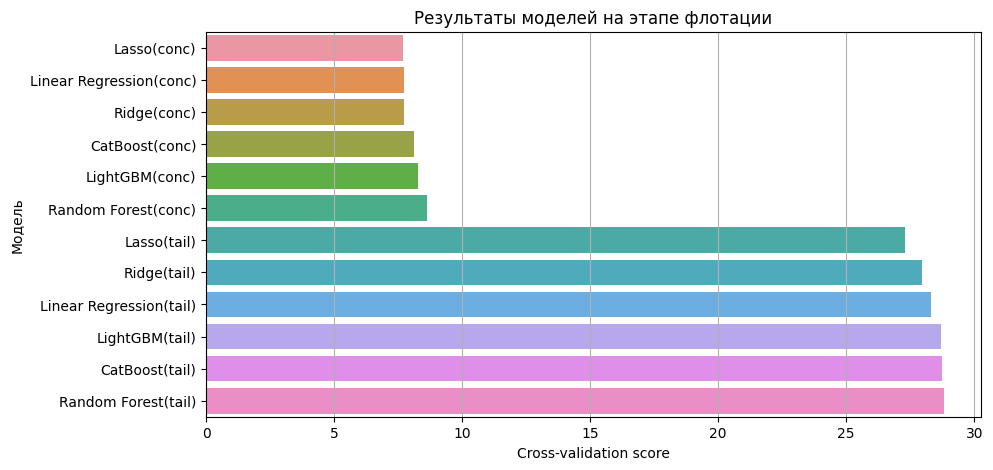

In [50]:
single_graph(
    'Результаты моделей на этапе флотации',
    'Модель',
    'sMAPE',
    size=(10, 5)
)
sns.barplot(
    data=rougher_table,
    y=rougher_table.index,
    x=rougher_table['Cross-validation score']
);

**Промежуточный вывод:**: для этапа флотации лучшей моделью стала Lasso (с гиперпараметрами alpha = 0.0072 и alpha = 0.029). Метрика sMAPE составила 7.702 для концентрации Au и 27.314 для отвального хвоста.

#### Финальный этап

Модель Lasso показала себя наилучшим образом на этапе rougher, используем ее для прогнозирования концентрации золота и отвального хвоста для следующего этапа.

In [51]:
# прогноз концентрации после этапа rougher
lasso_rougher[0][1].fit(
    rougher_feature_train,
    rougher_target_conc_train
)
rougher_conc_predict = lasso_rougher[0][1].predict(
    rougher_feature_train)
# прогноз отвального хвоста после этапа rougher
lasso_rougher[1][1].fit(
    rougher_feature_train,
    rougher_target_tail_train
)
rougher_tail_predict = lasso_rougher[1][1].predict(
    rougher_feature_train)

In [52]:
'''
создание таблицы с признаками без output
и добавление в нее предсказанных концентраций и хвостов с прошлого этапа
'''
final_feature_train = train_df.drop(
    train_df.filter(like='output').columns,
    axis=1)
final_feature_train.drop(columns='date', inplace=True)

final_feature_train = pd.concat(
    [final_feature_train,
     pd.Series(rougher_conc_predict,
               index=train_df.index,
               name='rougher_conc_predict'),
     pd.Series(rougher_tail_predict,
               index=train_df.index,
               name='rougher_tail_predict')],
    axis = 1)

final_target_conc_train = train_df['final.output.concentrate_au']
final_target_tail_train = train_df['final.output.tail_au']

final_feature_train.head(5)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_conc_predict,rougher_tail_predict
0,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1404.472046,11.836743,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,-516.403442,1554.367432,-493.428131,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,19.687932,1.773775
1,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1399.227084,11.996163,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,-499.865889,1574.479259,-498.931665,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,19.744729,1.779804
2,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,1599.337330,-450.008530,1399.180945,11.920305,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,-500.607762,1599.541515,-499.827444,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,19.614473,1.747206
3,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,1600.059442,-450.619948,1400.943157,11.692450,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,-499.677094,1600.449520,-500.052575,25.942508,-499.176749,23.955516,-499.848796,23.966838,-500.008812,23.954443,-499.944710,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,19.390728,1.701943
4,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,1600.208824,-449.599614,1401.560902,10.960521,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,-500.323246,1602.649541,-500.593010,26.024787,-500.279091,23.955345,-500.593614,23.985703,-500.083811,23.958945,-499.990309,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,19.232039,1.679849


In [53]:
%%time
# словарь для формирования сравнительной таблицы
storage = {}
# словарь для запуска обучения в цикле
names = {
    'Linear Regression(conc)': final_target_conc_train,
    'Linear Regression(tail)': final_target_tail_train
}
# хранилище пайплайнов
LR_final = []

for i in names.keys():
    LR_final.append(
        [i, pipe(
        LinearRegression(),
        'C',
        final_feature_train,
        names[i],
        None,
        i)]
    )
    print()

best_score: 6.156 для модели Linear Regression(conc)

best_score: 18.256 для модели Linear Regression(tail)

CPU times: total: 594 ms
Wall time: 433 ms


In [54]:
%%time
param_grid_RF = {
    'randomforestregressor__n_estimators': [10, 50, 100],
    'randomforestregressor__max_depth' : [10, 20, 30, 40, 50],
    'randomforestregressor__max_features' : ('sqrt', 'log2', None)
}
#словарь для запуска обучения в цикле
names = {
    'Random Forest(conc)': final_target_conc_train,
    'Random Forest(tail)': final_target_tail_train
}
#хранилище пайплайнов
RF_final = []
         
for i in names.keys():
    RF_final.append(
        [i, pipe(
        RandomForestRegressor(random_state=state),
        'R',
        final_feature_train,
        names[i],
        param_grid_RF,
        i
        )]
    )
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score: 6.401
best_params: {'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_features': None, 'randomforestregressor__max_depth': 10} для модели Random Forest(conc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_score: 17.656
best_params: {'randomforestregressor__n_estimators': 100, 'randomforestregressor__max_features': None, 'randomforestregressor__max_depth': 10} для модели Random Forest(tail)

CPU times: total: 2min 47s
Wall time: 14min 52s


In [55]:
%%time
param_grid_lasso = {
    'lasso__alpha': np.logspace(-6, 6, 200)
}
# словарь для запуска обучения в цикле
names = {
    'Lasso(conc)': final_target_conc_train,
    'Lasso(tail)': final_target_tail_train
}
# хранилище пайплайнов
lasso_final = []

for i in names.keys():
    lasso_final.append(
        [i, pipe(
        Lasso(random_state=state),
        'G',
        final_feature_train,
        names[i],
        param_grid_lasso,
        i)]
    )
    print()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 5.531 для модели Lasso(conc)
best_params: {'lasso__alpha': 0.4055460735840828}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 16.42 для модели Lasso(tail)
best_params: {'lasso__alpha': 0.0505263106533568}

CPU times: total: 12.3 s
Wall time: 2min 8s


In [56]:
%%time
param_grid_ridge = {
    'ridge__alpha': np.logspace(-6, 6, 200)
}
# словарь для запуска обучения в цикле
names = {
    'Ridge(conc)': final_target_conc_train,
    'Ridge(tail)': final_target_tail_train
}
# хранилище пайплайнов
ridge_final = []

for i in names.keys():
    ridge_final.append(
        [i, pipe(
        Ridge(random_state=state),
        'G',
        final_feature_train,
        names[i],
        param_grid_ridge,
        i)]
    )
    print()

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 5.602 для модели Ridge(conc)
best_params: {'ridge__alpha': 82143.43584919423}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best_score: 17.42 для модели Ridge(tail)
best_params: {'ridge__alpha': 3370.0643292719246}

CPU times: total: 7.47 s
Wall time: 15.7 s


In [57]:
%%time
param_grid_lgbm = {
    'lgbmregressor__num_leaves': range(10, 50, 10),
    'lgbmregressor__learning_rate': np.logspace(-1, 0, 5),
}
# словарь для запуска обучения в цикле
names = {
    'LightGBM(conc)': final_target_conc_train,
    'LightGBM(tail)': final_target_tail_train
}
# хранилище пайплайнов
lgbm_final = []

for i in names.keys():
    lgbm_final.append(
        [i, pipe(
        lgb.LGBMRegressor(random_state=state),
        'G',
        final_feature_train,
        names[i],
        param_grid_lgbm,
        i)]
    )
    print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score: 6.321 для модели LightGBM(conc)
best_params: {'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__num_leaves': 10}

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best_score: 17.543 для модели LightGBM(tail)
best_params: {'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__num_leaves': 10}

CPU times: total: 5.48 s
Wall time: 23.3 s


In [58]:
%%time
param_grid_cat = {
    'catboostregressor__depth': range(4, 16, 4),
    'catboostregressor__learning_rate': np.logspace(-1, 0, 10),
}
#словарь для запуска обучения в цикле
names = {'CatBoost(conc)': final_target_conc_train,
         'CatBoost(tail)': final_target_tail_train
}
#хранилище пайплайнов
cat_final = []

for i in names.keys():
    cat_final.append(
        [i, pipe(
        CatBoostRegressor(
            random_state=state,
            iterations = 100),
        'R',
        final_feature_train,
        names[i],
        param_grid_cat,
        i)]
    )
    print()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 3.9167048	total: 4.55ms	remaining: 450ms
1:	learn: 3.8782773	total: 9.32ms	remaining: 457ms
2:	learn: 3.8443845	total: 13.2ms	remaining: 426ms
3:	learn: 3.8175669	total: 17.2ms	remaining: 412ms
4:	learn: 3.7901455	total: 21.2ms	remaining: 402ms
5:	learn: 3.7671880	total: 25ms	remaining: 392ms
6:	learn: 3.7468095	total: 29ms	remaining: 386ms
7:	learn: 3.7312094	total: 32.8ms	remaining: 377ms
8:	learn: 3.7134828	total: 36.7ms	remaining: 371ms
9:	learn: 3.6980392	total: 40.7ms	remaining: 366ms
10:	learn: 3.6804119	total: 44.6ms	remaining: 360ms
11:	learn: 3.6663346	total: 48.4ms	remaining: 355ms
12:	learn: 3.6528114	total: 52.4ms	remaining: 350ms
13:	learn: 3.6358464	total: 56.4ms	remaining: 347ms
14:	learn: 3.6237635	total: 60.7ms	remaining: 344ms
15:	learn: 3.6125634	total: 64.7ms	remaining: 340ms
16:	learn: 3.6035744	total: 68.7ms	remaining: 335ms
17:	learn: 3.5940371	total: 72.7ms	remaining: 331ms
18:	learn: 3.5797

90:	learn: 0.5545523	total: 415ms	remaining: 41.1ms
91:	learn: 0.5540629	total: 419ms	remaining: 36.5ms
92:	learn: 0.5533627	total: 423ms	remaining: 31.8ms
93:	learn: 0.5524491	total: 427ms	remaining: 27.3ms
94:	learn: 0.5517692	total: 431ms	remaining: 22.7ms
95:	learn: 0.5512758	total: 435ms	remaining: 18.1ms
96:	learn: 0.5505797	total: 438ms	remaining: 13.6ms
97:	learn: 0.5499484	total: 442ms	remaining: 9.02ms
98:	learn: 0.5494293	total: 446ms	remaining: 4.5ms
99:	learn: 0.5489476	total: 450ms	remaining: 0us
best_score: 17.009
best_params: {'catboostregressor__learning_rate': 0.1, 'catboostregressor__depth': 4} для модели CatBoost(tail)

CPU times: total: 9.86 s
Wall time: 17min 43s


Для принятия решения выведем сравнительную таблицу и график.

In [59]:
final_table = pd.DataFrame(storage).T.sort_values(by=0)
final_table.columns = ['Cross-validation score']
final_table

,Cross-validation score
Lasso(conc),5.531
Ridge(conc),5.602
CatBoost(conc),6.048
Linear Regression(conc),6.156
LightGBM(conc),6.321
Random Forest(conc),6.401
Lasso(tail),16.420
CatBoost(tail),17.009
Ridge(tail),17.420
LightGBM(tail),17.543


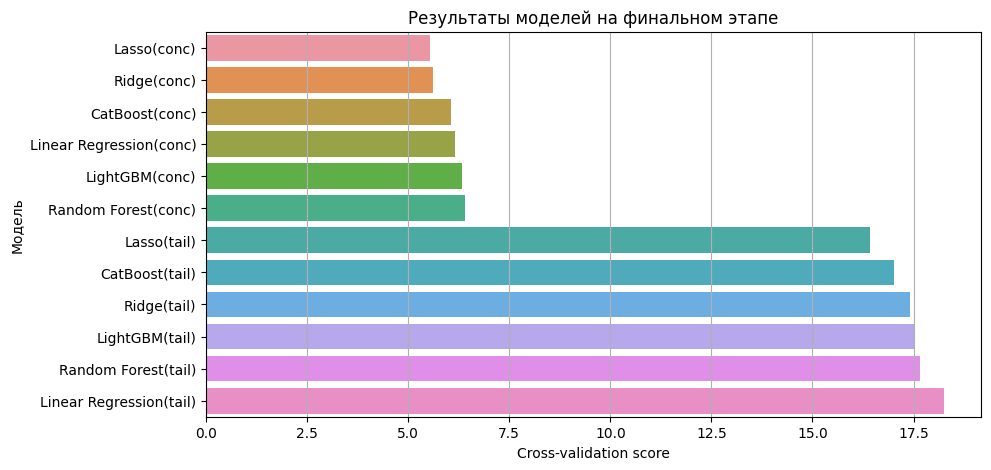

In [60]:
single_graph(
    'Результаты моделей на финальном этапе',
    'Модель',
    'sMAPE',
    size=(10, 5)
)
sns.barplot(
    data=final_table,
    y=final_table.index,
    x=final_table['Cross-validation score']
);

**Промежуточный вывод:** для финального этапа лучшей моделью стала Lasso (с гиперпараметрами alpha =  0.4055 и alpha = 0.0505). Метрика sMAPE составила 5.531 для концентрации Au и 16.420 на отвальном хвосте.

### Прогнозирование на тестовой выборке

По аналогии с обучающей выборкой сначала отделим флотационную часть таблицы и спрогнозируем концентрацию золота и отвальные хвосты.

In [61]:
rougher_feature_test = pd.concat(
    [test_df.filter(like='rougher.input'), 
     test_df.filter(like='rougher.state')], 
    axis=1)

# берем концентрацию из full_df по датам
rougher_target_conc_test = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['rougher.output.concentrate_au']],
    axis=1, join='inner')['rougher.output.concentrate_au']
rougher_target_conc_test.reset_index(drop=True, inplace=True)

# берем хвосты из full_df по датам
rougher_target_tail_test = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['rougher.output.tail_au']],
    axis=1, join='inner')['rougher.output.tail_au']
rougher_target_tail_test.reset_index(drop=True, inplace=True)

# берем recovery(rougher) из full_df по датам
rougher_test_recovery = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['rougher.output.recovery']],
    axis=1, join='inner')['rougher.output.recovery']
rougher_test_recovery.reset_index(drop=True, inplace=True)

rougher_feature_test.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air
0,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,6.168939,1196.238112,-299.862743,1147.248241,-500.363165,849.441918
1,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,6.209517,1201.904177,-299.907308,1154.087804,-500.036580,851.589767
2,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,7.358308,1200.826926,-300.124116,1150.754676,-499.986009,850.170086
3,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,6.929364,1199.292489,-299.778385,1152.512559,-500.338106,851.957342
4,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,7.824875,1198.005449,-300.283401,1099.481500,-499.702465,800.533525


In [62]:
# прогноз концентрации Au и хвостов на тестовой выборке
# модель уже была предобучена в главе 3.1.2
rougher_conc_predict = lasso_rougher[0][1].predict(
    rougher_feature_test)
rougher_tail_predict = lasso_rougher[1][1].predict(
    rougher_feature_test)
print(f'sMAPE модели {lasso_rougher[0][0]}: '
     f'{smape(rougher_target_conc_test, rougher_conc_predict):.3f}')
print(f'sMAPE модели {lasso_rougher[1][0]}: '
     f'{smape(rougher_target_tail_test, rougher_tail_predict):.3f}')

sMAPE модели Lasso(conc): 6.702
sMAPE модели Lasso(tail): 26.529


Ошибка на тестовой выборке оказалась даже ниже, чем на тренировочной. Вычислим sMAPE(rougher).

In [63]:
rougher_recovery = recovery_calc(
    rougher_conc_predict,
    test_df['rougher.input.feed_au'],
    rougher_tail_predict
)
rougher_recovery.reset_index(drop=True, inplace=True)

smape_r = smape(rougher_test_recovery, rougher_recovery)
print(f'sMAPE recovery на этапе флотации: '
     f'{smape_r:.3f}')

sMAPE recovery на этапе флотации: 5.393


Спрогнозируем концентрацию золота и отвальные хвосты на финальном этапе.

In [64]:
# создание таблицы с признаками без output и добавление в нее предсказанных концентраций и хвостов с прошлого этапа
final_feature_test = pd.concat(
    [test_df.drop(columns='date'),
     pd.Series(rougher_conc_predict,
               index=test_df.index,
               name='rougher_conc_predict'),
     pd.Series(rougher_tail_predict,
               index=test_df.index,
               name='rougher_tail_predict')],
    axis=1)

# берем концентрацию из full_df по датам
final_target_conc_test = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['final.output.concentrate_au']],
    axis=1, join='inner')['final.output.concentrate_au']
final_target_conc_test.reset_index(drop=True, inplace=True)

# берем хвосты из full_df по датам
final_target_tail_test = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['final.output.tail_au']],
    axis=1, join='inner')['final.output.tail_au']
final_target_tail_test.reset_index(drop=True, inplace=True)

# берем recovery(final) из full_df по датам
final_test_recovery = pd.concat(
    [test_df.set_index('date'),
     full_df.set_index('date')['final.output.recovery']],
    axis=1, join='inner')['final.output.recovery']
final_test_recovery.reset_index(drop=True, inplace=True)

final_feature_test.head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_e_air,rougher.input.floatbank11_sulfate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_conc_predict,rougher_tail_predict
0,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,849.441918,6.168939,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,-399.957321,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575,15.105315,0.827341
1,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,851.589767,6.209517,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,-400.383265,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,14.879742,0.817591
2,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,850.170086,7.358308,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,-400.166490,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,15.816116,0.974430
3,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,851.957342,6.929364,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,-400.291472,1650.782696,-399.597977,35.038256,-500.102649,30.066959,-500.211499,26.013515,-500.054597,22.988928,-499.981410,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973,15.790888,0.988603
4,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,1099.481500,-499.702465,800.533525,7.824875,117.750648,6.954311,6.426667,0.731271,1649.411497,-399.853156,-400.321866,1650.398209,-400.654533,34.894598,-498.444587,30.020745,-533.831343,26.022094,-499.725484,22.992992,-499.891405,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805,17.164914,1.159288


In [65]:
# прогноз концентрации Au и хвостов на тестовой выборке
lasso_final[0][1].fit(
    final_feature_train,
    final_target_conc_train
)
lasso_final[1][1].fit(
    final_feature_train,
    final_target_tail_train
)
final_conc_predict = lasso_final[0][1].predict(
    final_feature_test)
final_tail_predict = lasso_final[1][1].predict(
    final_feature_test)
print(f'sMAPE модели {lasso_final[0][0]}: '
     f'{smape(final_target_conc_test, final_conc_predict):.3f}')
print(f'sMAPE модели {lasso_rougher[1][0]}: '
     f'{smape(final_target_tail_test, final_tail_predict):.3f}')

sMAPE модели Lasso(conc): 5.448
sMAPE модели Lasso(tail): 16.316


Вычислим sMAPE(final) и выведем таблицу с итоговым sMAPE.

In [66]:
final_recovery = recovery_calc(
    final_conc_predict,
    test_df['rougher.input.feed_au'],
    final_tail_predict
)
final_recovery.reset_index(drop=True, inplace=True)

smape_f = smape(final_test_recovery, final_recovery)
print(f'sMAPE recovery на финальном этапе: '
     f'{smape_f:.3f}')

sMAPE recovery на финальном этапе: 8.579


In [67]:
temp = pd.DataFrame(
    [{'sMAPE(rougher)':smape_r,
      'sMAPE(final)': smape_f}]
)
temp['sMAPE'] = smape_r  *0.25 + smape_f * 0.75
temp.index = ['Lasso']
temp.round(3)

,sMAPE(rougher),sMAPE(final),sMAPE
Lasso,5.393,8.579,7.783


### Проверка модели на адекватность

Сравним результаты с константной моделью, которая предсказывает медиану.

In [68]:
# создание "предсказаний" из медиан соответствующих таргетов
r_c = pd.Series(
    rougher_target_conc_test.median(),
    index=range(len(rougher_target_conc_test))
)
r_t = pd.Series(
    rougher_target_tail_test.median(),
    index=range(len(rougher_target_tail_test))
)
f_c = pd.Series(
    final_target_conc_test.median(),
    index=range(len(final_target_conc_test))
)
f_t = pd.Series(
    final_target_tail_test.median(), 
    index=range(len(final_target_tail_test))
)

In [69]:
dummy_rougher_recovery = recovery_calc(
    r_c,
    test_df['rougher.input.feed_au'].reset_index(drop=True),
    r_t
)
dummy_rougher_recovery.reset_index(drop=True, inplace=True)
dummy_r = smape(
    rougher_test_recovery,
    dummy_rougher_recovery
)
print(f'sMAPE константной (медианной) модели на этапе флотации: '
     f'{dummy_r:.3f}')

sMAPE константной (медианной) модели на этапе флотации: 8.063


In [70]:
dummy_final_recovery = recovery_calc(
    f_c,
    test_df['rougher.input.feed_au'].reset_index(drop=True),
    f_t
)
dummy_final_recovery.reset_index(drop=True, inplace=True)
dummy_f = smape(
    final_test_recovery,
    dummy_final_recovery
)
print(f'sMAPE константной (медианной) модели на финальном этапе: '
     f'{dummy_f:.3f}')

sMAPE константной (медианной) модели на финальном этапе: 15.464


In [71]:
temp.loc['Dummy', :] = [
    dummy_r,
    dummy_f,
    dummy_r  * 0.25 + dummy_f * 0.75]
temp.round(3)

,sMAPE(rougher),sMAPE(final),sMAPE
Lasso,5.393,8.579,7.783
Dummy,8.063,15.464,13.614


Константная модель показала себя хуже на тестовой выборке. Выбранная модель прошла проверку на адекватность.

**Вывод:** В рамках решения задачи были выполнены следующие этапы:
- проведены исследование и предобработка данных,
- проверена мультиколлинеарность,
- удалены пропуски,
- выполнена проверка на дубликаты,
- проведен sanity check,
- проверена эффективность обогащения _recovery_,
- построены распределения металлов на этапах процесса обогащения,
- построены распределения размеров гранул на обучающей и тестовой выборках,
- проверена суммарная концентрация меттало на этапах процесса обогащения,
- обучены несколько моделей,
- по результатам кросс-валидации в качестве основной выбрана модель Lasso,
- спрогнозированы концентрации и отвальные хвосты золота на этапах rougher и final.

По итогам прогнозирования итоговый sMAPE составил 7.2%.

Концентрация золота распределяется по нормальному закону во всех этапах, заметно, что доля золота растет после каждого процесса обогащения. Можно отметить, что концентрат первой очистки имеет большую дисперсию, чем остальные этапы.